https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/#:~:text=There%20are%20many%20ways%20for,used%20metrics%20for%20classification%20problems.

for more details  visit analytics vidhya

**Lec-28**

Machine Learning is classified into four types. They are Supervised, Unsupervised, Semi-supervised, and Reinforcement Learning. 

Supervised Learning deals with the model being trained with labeled data and making predictions on it. It is easy to evaluate these models as the true values(correct values) are already known.

 Unsupervised Learning deals with unlabelled datasets where there are no labels given to them or which cannot be given to them.

 Semi-supervised is the combination of both supervised and unsupervised where some of the data contain labels and others don’t. During training, it uses a smaller labeled data set to guide classification and feature extraction from a larger, unlabeled data set.

 Reinforcement Learning is like trial and error methods where the correct predictions are rewarded and the incorrect predictions model is penalized and retrained for actions.

Supervised Learning is further classified into two types. They are Regression and Classification tasks. 
#Differentiate classification and regression.
Regression is used for predicting the continuous values and Classification in predicting the discrete values. More clearly, Regression is used for numerical value prediction and Classification for categorical data prediction.

Eg: Regression is used for the prediction of house prices, Stock prices, fare prediction, ..etc.Classification is used for the prediction of medical diagnosis(disease is present or not), fraud detection(fraud or no fraud), Rain forecast(Rain or no rain), etc.

Metrics: Methods to evaluate ML akgorithim/model is called matrics.
eg Mean absolute error,standard deviation.

For classification ,model are different than regression so matrics will be different like Classification Accuracy,Logarithmic Loss,Confusion Matrix,Area under Curve,F1 Score etc.

**1: Confusion Matrix**:A confusion matrix is defined as thetable that is often used to describe the performance of a classification model on a set of the test data for which the true values are known.

https://en.wikipedia.org/wiki/Confusion_matrix


Recall (Sensitivity Rate): Out of all the data that is actually positive (or negative), how much percentage of it is predicted correctly?

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

**Precision** (Predictive Value): Out of all the data that is predicted positive (or negative), how much is actually predicted correctly?

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

**Trick**: tripple p(ppp) p in precision,p in true positive(TP),p in false positive(FP)

Precision: How precise are you in predicting. (If you are predicting 100 values as positive, how much percentage of is really positive?)

Recall: How well are you predicting something as positive if it is positive in real world.

F-Measure / F-Score / F1-Score: Gives a better sense of whether our model is accurate using precision and recall.

F-Measure: (2*Precision*Recall) / (Precision + Recall)

ROC Curve (Receiver Operating Characteristic Curve):The Receiver Operator Characteristic (ROC) is a probability curve that plots the TPR(True Positive Rate) against the FPR(False Positive Rate) . 

AUC (Area Under the Curve): Range from 0 to 1.
If AUC is closer to 1, (Model predicts well)
If AUC is closer to 0, (Model predicts badly)


the greater the AUC, the better is the performance of the model at different threshold points between positive and negative classes. This simply means that When AUC is equal to 1, the classifier is able to perfectly distinguish between all Positive and Negative class points. When AUC is equal to 0, the classifier would be predicting all Negatives as Positives and vice versa. When AUC is 0.5, the classifier is not able to distinguish between the Positive and Negative classes.

TPR:True positive/tottal positive(TP + FN)

FPR = FP/tottal neagative(TN +FP)

**Working of AUC** —In a ROC curve, the X-axis value shows False Positive Rate (FPR),  and Y-axis shows True Positive Rate (TPR). Higher the value of X means higher the number of False Positives(FP) than True Negatives(TN), while a higher Y-axis value indicates a higher number of TP than FN. So, the choice of the threshold depends on the ability to balance between FP and FN.

Stratifying / Stratification - Stratified Sampling: Instead of random sampling of data (You may not have good proportion of data from all classes). Stratification helps provide better coverage of each class of data.

Using K Fold on a classification problem can be tricky. Since we are randomly shuffling the data and then dividing it into folds, chances are we may get highly imbalanced folds which may cause our training to be biased. For example, let us somehow get a fold that has majority belonging to one class(say positive) and only a few as negative class. This will certainly ruin our training and to avoid this we make stratified folds using stratification.

Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

Cross Validation - (K-Fold Cross Validation). K maybe 10, 10 Fold cross validation.

all about cross validation:https://www.mygreatlearning.com/blog/cross-validation/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html?highlight=cross%20val#sklearn.model_selection.cross_validate



#LOGISTIC REGRESSION

**Lec 29,30**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quant Master/Classification/Social_Network_Ads.csv')

In [ ]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

here no. of  0 = no of people not purchased

no. 0f 1 = no of people purchased

In [ ]:
dataset.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
dataset = dataset.drop('User ID',axis = 1)

In [ ]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
dataset.isnull().values.any()   #or

False

In [ ]:
dataset.isnull().values

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       ...,
       [False, False, False, False],
       [False, False, False, False],
       [False, False, False, False]])

so we have no null values

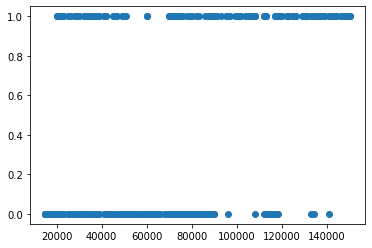

In [ ]:
plt.scatter(dataset['EstimatedSalary'],dataset['Purchased'])

from above plot we can see that less salary people has purchased and also some less salary people also  has not purchased similirly high salary people has purchased  and also high salary people also has not purchased

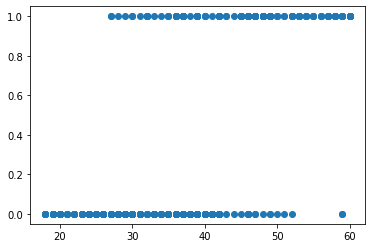

In [ ]:
plt.scatter(dataset['Age'],dataset['Purchased'])

similirly here people b/w age 25 to 55 are purchasing as well as not purchasing but whose age is less than 25 are generally not purchasing and whose age is more than 55 are generally purchasing

In [ ]:
dataset['Gender'] = pd.get_dummies(dataset['Gender'],drop_first = True)

In [ ]:
genders = pd.get_dummies(dataset['Gender'])


In [ ]:
genders

,0,1
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [ ]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
x = dataset.iloc[:,[0,1,2]].values
y = dataset.iloc[:,-1].values

In [ ]:
y = y.reshape((-1,1))

In [ ]:
y.shape

(400, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size = 0.2,
                                                 random_state = 2022)

In [ ]:
x[:5,:]

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       [    0,    27, 57000],
       [    1,    19, 76000]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

In [ ]:
scalerX = scalerX.fit(x_train)

In [ ]:
scalerX.mean_

array([4.906250e-01, 3.772500e+01, 7.050625e+04])

In [ ]:
scalerX.var_

array([2.49912109e-01, 1.08018125e+02, 1.16506246e+09])

In [ ]:
x_train = scalerX.transform(x_train)

In [ ]:
x_train[:5,:]

array([[-0.98142253,  1.66214818,  1.7429974 ],
       [ 1.01892912, -0.55084216, -1.53828356],
       [ 1.01892912,  0.21889361, -0.33710035],
       [-0.98142253,  1.18106332,  0.51251704],
       [ 1.01892912,  0.79619544,  0.24884268]])

here we will only use fit for training data and then will transform training data ,once we have fit then we will not fit again  like for testing data ,for testing data we will just transform from  previous calculatted mean and standard deviation(during fitting of training data) 

In [ ]:
x_test = scalerX.transform(x_test)

In [ ]:
x_test[:5,:]

array([[ 1.01892912, -1.12814399, -1.12812344],
       [ 1.01892912, -0.35840822,  1.21564868],
       [-0.98142253, -1.12814399, -1.62617501],
       [ 1.01892912, -0.93571005, -0.33710035],
       [-0.98142253,  2.04701607,  0.16095123]])

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 2022)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=2022)

In [ ]:
y_pred = logreg.predict(x_test)

see page 35 notes to know how logistic regression workes

**Lec 31**

In [ ]:
from sklearn.metrics import accuracy_score   # see notes page 33
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score        # see notes 33
print("F-Measure: ",f1_score(y_test,y_pred)*100)



Accuracy:  85.0
F-Measure:  76.92307692307692


Here F-Measure is low means overall accuracy is not good I.e. recall and precision both is not good

In [ ]:
logreg.predict(x_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
logreg.predict_proba(x_test)
# see notes page 36,37

array([[0.99065802, 0.00934198],
       [0.57137934, 0.42862066],
       [0.9954079 , 0.0045921 ],
       [0.96550799, 0.03449201],
       [0.02835564, 0.97164436],
       [0.70579315, 0.29420685],
       [0.60749172, 0.39250828],
       [0.7536348 , 0.2463652 ],
       [0.01028388, 0.98971612],
       [0.98718634, 0.01281366],
       [0.66140119, 0.33859881],
       [0.9909804 , 0.0090196 ],
       [0.99744886, 0.00255114],
       [0.31172382, 0.68827618],
       [0.9950866 , 0.0049134 ],
       [0.56464632, 0.43535368],
       [0.94423067, 0.05576933],
       [0.78029611, 0.21970389],
       [0.20439467, 0.79560533],
       [0.99024246, 0.00975754],
       [0.8925247 , 0.1074753 ],
       [0.91085174, 0.08914826],
       [0.98569098, 0.01430902],
       [0.603746  , 0.396254  ],
       [0.92323247, 0.07676753],
       [0.47197241, 0.52802759],
       [0.70085092, 0.29914908],
       [0.91980699, 0.08019301],
       [0.07543438, 0.92456562],
       [0.93730197, 0.06269803],
       [0.

for calculting AUC_ROC socre and curve we need probablities that product will purchase or not 

ROC curve and score will be calculted for each class(class 0 :product will purchase, class 1 product will not purchase)

AUC:  0.9447938504542279


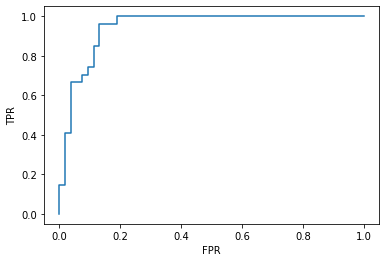

Confusion Matrix: 


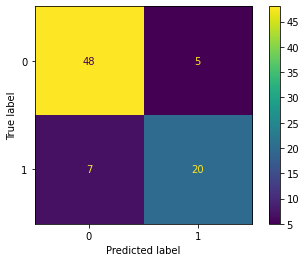

In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)
#here we are providing all rows and column having index 1(I.e predicted positive probablities) I.e probablities of product will be purchased and ROC curve will be ploted for class 1

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

AUC for not purchased is  very low means accuracy of predicting that product will not purchased is low.

Here TP = 20 (we are predicting that 25(20 +5) people will purchase but actually 20 people are actuallly purchasing)

FP = 5 (we are predicting 5 people will purchase but these five people will not actually purchase)

FN = 7 (wew are predicting that 7 people will not purchase but actually these 7 people are purchasing)

TN = 48 (we predict that 55(48 +7) people will not purchase but actually only 48 people will not purchase)

accuracy for prediction of not purchasing = 48/55 = 87 % = precision of not purchasing

accuracy for prdiction of purchasing = 20/25 = 80 % = precision of purchasing



Logistic Regression Parameters:

below is the parameter that we can provide to increase the model accuracy but our defaullt value is working good

Penalty: l1, l2, elasticnet.

l1: liblinear, saga

l2: sag,saga,cg,lbfgs

elasticnet: saga

Solver: 

lbfgs : Limited Memory BFGS (Lim. memory available)

liblinear : Good for small datasets only.

sag / saga : Stochastic Avg. Gradient 
Descent - Good for time efficient solvers in large dataset.

1: Out of all the data predicted as PURCHASED, what is the accuracy of prediction?


2: Out of all the data predicted as NOT PURCHASED, what is the accuracy of prediction?

In [ ]:
#see notes 34
print("Out of all the data predicted as PURCHASED, what is the accuracy of prediction?")
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred,pos_label = 1)*100)

Out of all the data predicted as PURCHASED, what is the accuracy of prediction?
80.0


In [ ]:
print("Out of all the data predicted as NOT PURCHASED, what is the accuracy of prediction?")
from sklearn.metrics import precision_score
print(precision_score(y_test,y_pred,pos_label = 0)*100)

Out of all the data predicted as NOT PURCHASED, what is the accuracy of prediction?
87.27272727272727


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred,pos_label = 1)*100)

74.07407407407408


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test,y_pred,pos_label = 0)*100)

90.56603773584906


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        53
           1       0.80      0.74      0.77        27

    accuracy                           0.85        80
   macro avg       0.84      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80



here support - 27 means 27 are real 1 in y_test

here support - 53 means 53 are real 0 in y_test

We have seen acuuracy of logistic regression classification model now we will do classification from other classification model and will see what will be the acuuracy

#K NEAREST NEIGHBORS CLASSIFIER

see notes page 37,38,39 how knn workes

All data points (features) are put in a 2D axis.

A new data point which is to be classified is put onto the same 2D axis, you figure out the k nearest neighbors to the new point.

Find out which category does most neighbors (out of k neighbors) belong to? That is the category to which the new data point belongs to.

how to choose optimum k ?

k = very low (overfitting)

k = very high (underfitting)

consider an extreme case, K=1, what will it happen? The training data will be perfectly predicted, The bias will be 0 when K=1, however, when it comes to new data (in test set), it has higher chance to be an error, which causes high variance. When we increase K, the training error will increase (increase bias), but the test error may decrease at the same time (decrease variance). We can think that when K becomes larger, since it has to consider more neighbors, its model is more complex.

how to choose k : https://www.analyticsvidhya.com/blog/2021/04/simple-understanding-and-implementation-of-knn-algorithm/


how to choose k :https://medium.com/30-days-of-machine-learning/day-3-k-nearest-neighbors-and-bias-variance-tradeoff-75f84d515bdb

**Lec 32**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier   #import KNN classifier model

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=8, weights='uniform')
# n_neighbors is = value of K ,by default it is k =5,here at k = 8 accuracy is much better ,we can check for another value of k
#see notes page 39 for what is weights?
knn_classifier.fit(x_train,y_train)
y_pred = knn_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


weights{‘uniform’, ‘distance’}  default=’uniform’
Weight function used in prediction. Possible values:

‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.


Accuracy:  88.75
F-Measure:  84.21052631578948
AUC:  0.9447938504542279


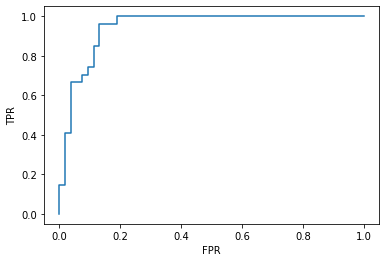

Confusion Matrix: 


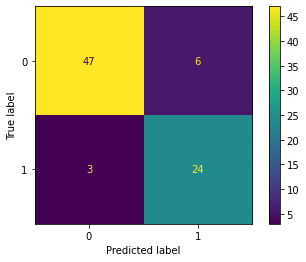

In [ ]:
from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

here overall wrong prediction is (6+3) which is lesser than logistic regression where wrong prediction is 12 so over all moder accuracy(F score) is better than logistic regression

**lec 33**

#SUPPORT VECTOR CLASSIFIER

In [ ]:
from sklearn.svm import SVC      #SVC stand for support vector classsification
svc_classifier = SVC(C=5,gamma = 5,kernel = 'rbf')
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  86.25
F-Measure:  80.0
AUC:  0.9447938504542279


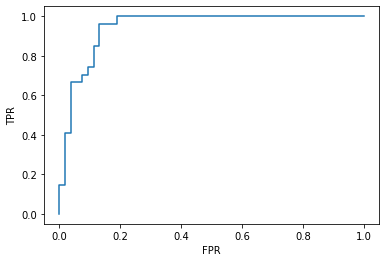

Confusion Matrix: 


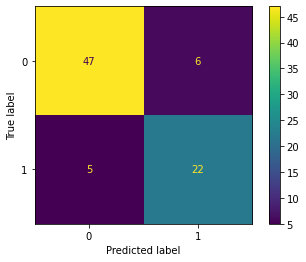

In [ ]:
from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

now can see tha SVC model is not better than KNN model ,but generally SVC model is better than other model like logistics,KNN etc ,there may be one possiblity that we are not tuning the model for best parameter so for best parameter we will use grid search.

In almost any Machine Learning project, we train different models on the dataset and select the one with the best performance. However, there is room for improvement as we cannot say for sure that this particular model is best for the problem at hand. Hence, our aim is to improve the model in any way possible. One important factor in the performances of these models are their hyperparameters, once we set appropriate values for these hyperparameters, the performance of a model can improve significantly. In this article, we will find out how we can find optimal values for the hyperparameters of a model by using GridSearchCV.

First, let us understand what is grid search? It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

GridSearchCV is a function that comes in Scikit-learn’s(or SK-learn) model_selection package.This function helps to loop through predefined hyperparameters (means it will use all comination of hyperparameter that we have given )and fit your estimator (model) on your training set for each combination of hyperparameter. So, in the end, we can select the best parameters from the listed hyperparameters.

**How does GridSearchCV work?**

As mentioned above, we pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take. Here is an example of it for support vector classification:

{ 'C': [0.1, 1, 10, 100, 1000],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
   
   'kernel': ['rbf',’linear’,'sigmoid']  }

Here C, gamma and kernels are some of the hyperparameters of an SVM model. Note that the rest of the hyperparameters will be set to their default values

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

**let us see what are the various arguments that are taken by GridSearchCV function :**

sklearn.model_selection.GridSearchCV(estimator, param_grid,scoring=None,
          n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, 
          pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False) 

**1.estimator:** Pass the model instance/model for which you want to check the hyperparameters.

**2.params_grid:** the dictionary object that holds the hyperparameters you want to try.

**3.scoring:** evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric. Like accuracy_score for classification and R2_score for regression.

**4.cv:** number of cross-validation you have to try for each selected set of hyperparameters.





In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
df_cancer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quant Master/breast cancer data/data.csv')

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_grid = [{'C': [0.1, 1, 5,10,50,100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,5,10,50,100], 
              'kernel': ['linear','rbf']}]  
gridsearch_obj = GridSearchCV(estimator = svc_classifier,
             param_grid = parameters_grid,
             scoring = 'accuracy',
             cv = 10)


here cv means cross validation where fold = 10 so for training data it will make 10 sets and will train the model for each set and for each combination of hyperparameters.

In [ ]:
gridsearch_results = gridsearch_obj.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
gridsearch_results.best_score_

0.9125

In [ ]:
gridsearch_results.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

now we can see that thes SVC model is for above parameters,here we can still improve the model by changing the nearby value like below code

In [ ]:
from sklearn.model_selection import GridSearchCV
#parameter grid is a list of dictionaries of parameters that the model should be tested on
parameters_grid = {'C':[1.05,1.08,1.1,1.12,1.15],
                   'kernel':['rbf','linear'],'gamma':[1.15,1.18,1.2,1.22,1.25]}
gridsearch_obj = GridSearchCV(estimator = svc_classifier,
             param_grid = parameters_grid,
             scoring = 'accuracy',
             cv = 10)

In [ ]:
gridsearch_results = gridsearch_obj.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
gridsearch_results.best_score_

0.915625

now we can see we have got slightly better score than previous one

In [ ]:
gridsearch_results.best_params_

{'C': 1.05, 'gamma': 1.22, 'kernel': 'rbf'}

similirly we can apply grid search for KNN for different value of and for different weights

In [ ]:
list_neighbors = [i for i in range(1,25)]
from sklearn.model_selection import GridSearchCV
#parameter grid is a list of dictionaries of parameters that the model should be tested on
parameters_grid = [{'n_neighbors':list_neighbors,
                    'weights':['uniform','distance']}]
#here we are providing different value of K from 1 to 25
gridsearch_obj = GridSearchCV(estimator = knn_classifier,
             param_grid = parameters_grid,
             scoring = 'accuracy',
             cv = 10)
#here we are providing estimator as KNN model name

In [ ]:
gridsearch_results = gridsearch_obj.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
gridsearch_results.best_score_

0.915625

In [ ]:
gridsearch_results.best_params_

{'n_neighbors': 8, 'weights': 'uniform'}

So during KNN classification initial we have put best value of K I.e K = 8 coincidently which we chave confirmed that best value of k =8 in KNN model by grid search. 

now we can use these best parameter values to calculate best result through the models.

grid search complete by great learning on breast cancer data :https://www.mygreatlearning.com/blog/gridsearchcv/

#DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)

Accuracy:  83.75
F-Measure:  77.19298245614034
AUC:  0.9447938504542279


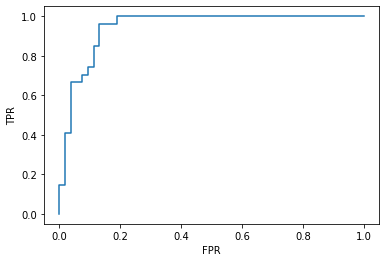

Confusion Matrix: 


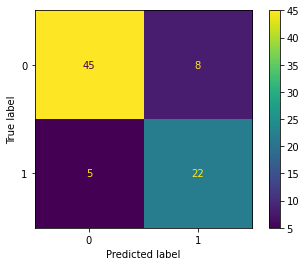

In [ ]:
from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

As we can see decision tree is not a good classifier and also acuuracy,f- score is very low and also number of false prediction is increases to 14 . 

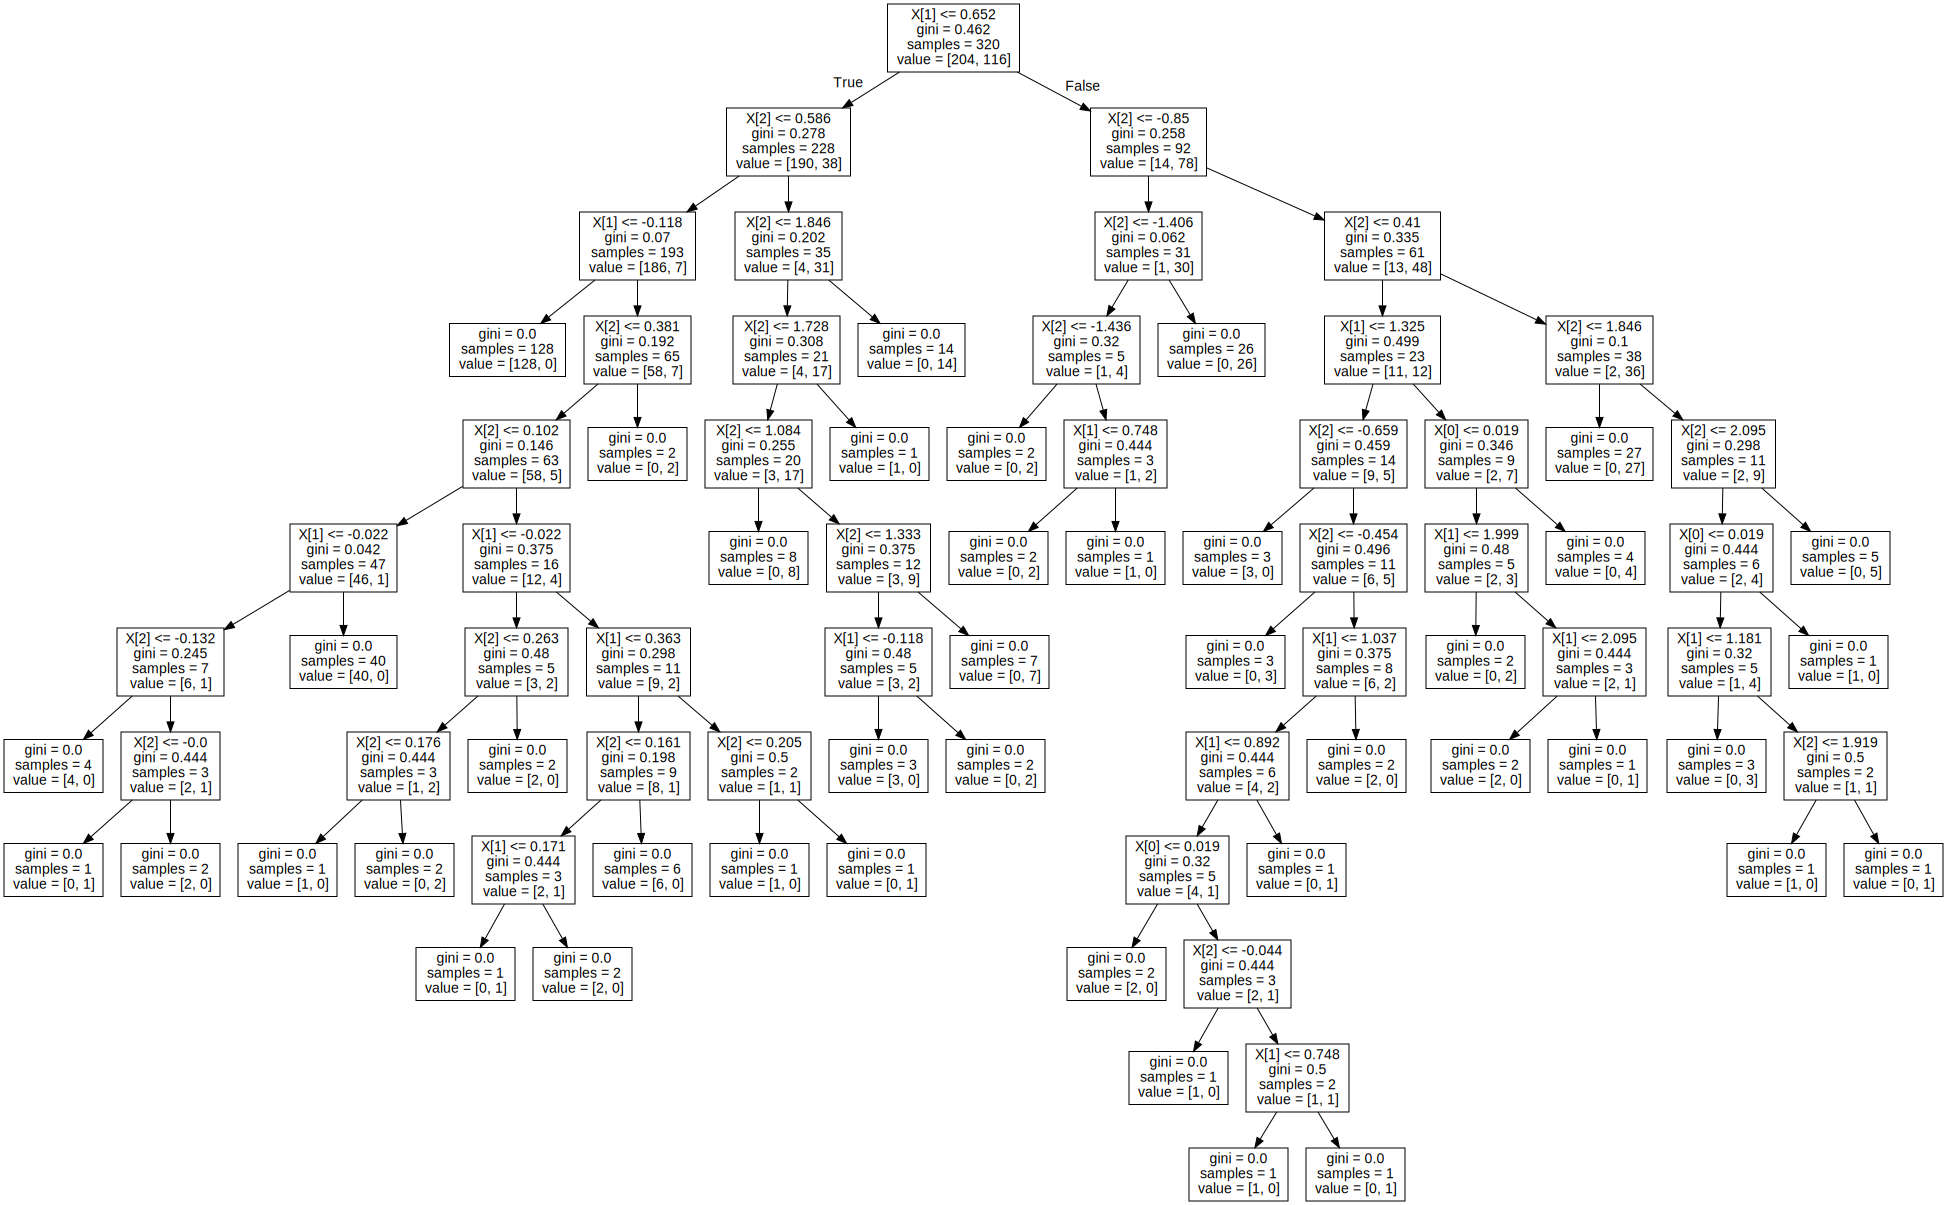

In [ ]:
#visualisation of decision tree
from sklearn import tree
import graphviz
data = tree.export_graphviz(decision_tree)
graphviz.Source(data)

#RANDOM FOREST

The word ‘Forest’ in the term suggests that it will contain a lot of trees. The algorithm contains a bundle of decision trees to make a classification and it is also considered a saving technique when it comes to overfitting of a decision tree model. A decision tree model has high variance and low bias which can give us pretty unstable output unlike the commonly adopted logistic regression, which has high bias and low variance.

In the machine learning world, a Random forest is a combination /ensemble of Decision Trees.



Example of random forest in real life:

So, let us understand what a decision tree is before we combine it to create a forest.

Imagine you are going to make a major expense, say buy a car.  assuming you would want to get the best model that fits your budget, you would not just walk into a showroom and walk out rather drive out with your car. Is it that so?

So, Let’s assume you want to buy a car for 4 adults and 2 children, you prefer an SUV with maximum fuel efficiency, you prefer a little luxury like good speakers, sunroof, cosy seating and say you have shortlisted models A and B.

Tree 1 --> Model A is recommended by your friend X because the speakers are good, and the fuel efficiency is the best.

Tree 2 --> Model B is recommended by your friend Y because it has 6 comfortable seats, speakers are good and the sunroof is good, the fuel efficiency is low, but he feels the other features convince her that it is the best.

Tree 3 -->Model B is recommended by your friend Z as well because it has 6 comfortable seats, speakers are better and the sunroof is good, the fuel efficiency is good in her rating.

It is very likely that you would go with Model B as you have majority voting to this model from your friends. Your friends have voted considering the features of their choice and a decision model based on their own logic.*mind it each tree has different fetures or we can say each tree has subset of fetures from our required fetures*

Imagine your friends X, Y, Z as decision trees, you created a random forest with few decision trees and based on the outcomes, you chose the one that was recommended by the majority.I.e decision which is made by mjaority of trees will be finial classification answer.

This is how a classifier Random forest works.

Some interesting facts about Random Forests – 

-Accuracy of Random forest is generally very high

-Its efficiency is particularly Notable in Large Data sets

-Provides an estimate of important variables in classification

-Forests Generated can be saved and reused

-Unlike other models It does nt overfit with more features

**working of random forest:**

A random forest is a collection of Decision Trees, Each Tree independently makes a prediction, the values are then averaged (Regression) / Max voted (Classification) to arrive at the final value.

The strength of this model lies in creating different trees with different sub-features from the features. The Features selected for each tree is Random, so the trees do not get deep and are focused only on the set of features.

Each of the decision Tree may give you a Yes or No based on the data set. Each of the trees are independent and our decision using a decision tree would purely depend on the features that particular tree looks upon. 

If a decision tree considers all the features, the depth of the tree would keep increasing causing an over fit model(generall this happen when we creat single tree for all feture like in our previous algorithim). 

Finally, all tree are put together, we create an ensemble(group) of Decision Trees that provides a well-learned prediction,ultimately Decision will be based on the output from each tree. That would be called a random forest.Once we receive the output from every decision tree, we use the majority vote taken to arrive at the decision. To use this as a regression model, we would take an average of the values.



**Mechenism of random forest:**

The data for each tree is selected using a method called **bagging** which selects a random set of data points from the data set for each tree. The data selected can be used again (with replacement) or kept aside (without replacement). Each tree would randomly pick the features based on the subset of Data provided. This randomness provides the possibility of finding the feature importance, the feature that influences in the majority of the decision trees would be the feature of maximum importance.
Now once the trees are built with a subset of data and their own set of features, each tree would independently execute to provide its decision. This decision will be a yes or No in the case of classification.

There will then be an ensemble(group) of the trees created using methods such as stacking that would help reduce classification errors. The final output is decided by the max vote method for classification.

Please note that the features selected will be random and may repeat across trees, this increases the efficiency and compensates for missing data. While splitting a node, only a subset of features is taken into consideration and the best feature among this subset is used for splitting, this diversity results in a better efficiency.

**How does it differ from the Decision Tree?**

A decision tree offers a single path and considers all the features at once. So, this may create deeper trees making the model over fit. A Random forest creates multiple trees with random features, the trees are not very deep.

storage and computational capacities required are more for Random Forests than a decision tree.In summary, Random Forest provides much better accuracy and efficiency than a decision tree, this comes at a cost of storage and computational power.

decision tree structure largely depends on the training data and may change drastically even for a slight change in the training data, the random selection of features provides little deviation in terms of structure change with change in data. With the addition of Technique such as Bagging for selection of data, this can be further minimized.

details of random forest by great learning :https://www.mygreatlearning.com/blog/random-forest-algorithm/

Parameter of Random Forest:

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

commonly tuned hyperparameters are as below?

**1.N_estimators** = This parameter helps us to determine the number of Trees in the Forest, higher the number, we create a more robust aggregate model, but that would cost more computational power.( default=100)

**2.max_depth** =The maximum depth of the tree. This parameter restricts the number of levels of each tree. Creating more levels increases the possibility of considering more features in each tree. A deep tree would create an overfit model, but in Random forest this would be overcome as we would ensemble at the end.(Default = none) If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**3.max_features** -This parameter helps us restrict the maximum number of features to be considered at every tree. This is one of the vital parameters in deciding the efficiency. Generally, a Grid search with CV would be performed with various values for this parameter to arrive at the ideal value.

max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”

* If int, then consider max_features features at each split.int means we have to pass an integer that will be maximum number of feture for each tree.

* If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.

* If “auto”, then max_features=sqrt(n_features).

* If “sqrt”, then max_features=sqrt(n_features).

* If “log2”, then max_features=log2(n_features).

* If None, then max_features=n_features.

**4.bootstrap** = This would help us decide the method used for sampling data points, should it be with or without replacement.

bootstrap : bool, default=True

Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.when bootstrap = True then from statistics we know that bootstrap select data with replacement and repetation.

**5.max_samples** – This decides the percentage of data that should be used from the training data for training. This parameter is generally not touched, as the samples that are not used for training (out of bag data) can be used for evaluating the forest and it is preferred to use the entire training data set for training the forest.

*max_samples: int or float, default=None*

If bootstrap is True, the number of samples to draw from x_train to train each base estimator.

* If None (default), then draw X.shape[0] samples.(it will draw all sample/row)

* If int, then draw max_samples samples.I.e. it will draw integer number of sample that we have passed

* If float, then draw max_samples * X.shape[0] samples. Thus, max_samples should be in the interval (0.0, 1.0].

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #100 trees by default and also all other parameter are the default values
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:  85.0
F-Measure:  78.57142857142857
AUC:  0.9447938504542279


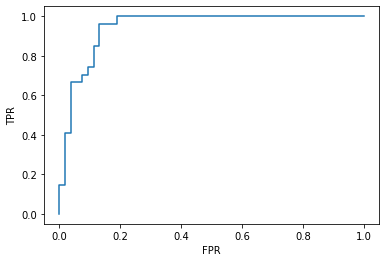

Confusion Matrix: 


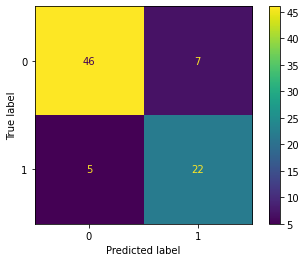

In [ ]:
from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

As we can see Random forest is better classification model than decision tree.Althogh it is not better than SVC model. 

now we will use grid search for better result

In [ ]:
'''
#this code will take almost 3 minute to run
from sklearn.model_selection import GridSearchCV
#parameter grid is a list of dictionaries of parameters that the model should be tested on
parameters_grid = [{'n_estimators':[10,20,50,75,100],
                    'criterion' : ['gini','entropy','log_loss'],
                    'max_features':['sqrt','log2',1,2,3],
                    'bootstrap' : ['True','False']}]
#here we are providing different value of K from 1 to 25
gridsearch_obj = GridSearchCV(estimator = rf,
             param_grid = parameters_grid,
             scoring = 'accuracy',
             cv = 5)
#here we are providing estimator as KNN model name'''

"\n#this code will take almost 3 minute to run\nfrom sklearn.model_selection import GridSearchCV\n#parameter grid is a list of dictionaries of parameters that the model should be tested on\nparameters_grid = [{'n_estimators':[10,20,50,75,100],\n                    'criterion' : ['gini','entropy','log_loss'],\n                    'max_features':['sqrt','log2',1,2,3],\n                    'bootstrap' : ['True','False']}]\n#here we are providing different value of K from 1 to 25\ngridsearch_obj = GridSearchCV(estimator = rf,\n             param_grid = parameters_grid,\n             scoring = 'accuracy',\n             cv = 5)\n#here we are providing estimator as KNN model name"

In [ ]:
#gridsearch_results = gridsearch_obj.fit(x_train,y_train)


In [ ]:
#gridsearch_results.best_score_


In [ ]:
#gridsearch_results.best_params_

As we can see best value of parameter as above inwhich boostrap,n_estimator are same as default values only criterion and max_feature is changes. 

Now we will use best paramter values in random forest model to see what will be predicted values and efficiency

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap = 'True',criterion = 'entropy',max_features = 2,n_estimators = 100) #100 trees by default and also all other parameter are the default values
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)'''

"from sklearn.ensemble import RandomForestClassifier\nrf = RandomForestClassifier(bootstrap = 'True',criterion = 'entropy',max_features = 2,n_estimators = 100) #100 trees by default and also all other parameter are the default values\nrf.fit(x_train,y_train)\ny_pred = rf.predict(x_test)"

In [ ]:
'''from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))'''

'from sklearn.metrics import accuracy_score \nprint("Accuracy: ",accuracy_score(y_test,y_pred)*100)\n\nfrom sklearn.metrics import f1_score\nprint("F-Measure: ",f1_score(y_test,y_pred)*100)\n\nfrom sklearn.metrics import roc_curve\nfpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)\n\nfrom sklearn.metrics import roc_auc_score\nprint("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))\n\nplt.plot(fpr,tpr)\nplt.xlabel("FPR")\nplt.ylabel("TPR")\nplt.show()\n\nprint("Confusion Matrix: ")\nfrom sklearn.metrics import ConfusionMatrixDisplay\nprint(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))'

As we can see our model does not  affected too much with best values and accuarcy,f sore and AUC are same as default values so some time default alues give better result.

#NAIVE BAYES CLASSIFIER

https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

https://www.cse.iitb.ac.in/~sunita/talks/bayesian_example.pdf

visit these link for detail explanation

A Naive Bayes classifier is a **probabilistic machine learning model** (dipend on probablity)that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

see page 41 to 55 in notes or explanation of naive bayes classification

**Types of NB Classifier:** 

**1: Bernoulli:** (All features are binary.) (Two class output) [Purchase / No].This type of algorithm is useful in data having binary features. The features can be of value yes or not, granted or not granted, useful or useless, etc.

**2: Multinomial:** (Features are discrete. Multi class classifier, generally) Rating of 1 to 5.

It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here one step further than  Bernoulli trials and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.  or

This is used when the features represent the frequency.Suppose you have a text document and you extract all the unique words and create multiple features where each feature represents the count of the word in the document. In such a case, we have a frequency as a feature. In such a scenario, we use multinomial Naive Bayes.It is known to work well with text classification problems.

If a given class and feature value never occur together in the training data, then the frequency-based probability estimate will be zero, because the probability estimate is directly proportional to the number of occurrences of a feature's value. This is problematic because it will wipe out all information in the other probabilities when they are multiplied. Therefore, it is often desirable to incorporate a small-sample correction, **called pseudocount**, in all probability estimates such that no probability is ever set to be exactly zero. This way of regularizing naive Bayes is c**alled Laplace smoothing when the pseudocount is one**, and **Lidstone smoothing in the general case**.

**3 Gaussian:** (Features are: Continuous data) [Height: 1.63,1.64,1.65...]

This type of Naive Bayes is used when variables are continuous in nature. It assumes that all the variables have a normal distribution. So if you have some variables which do not have this property, you might want to transform them to the features having distribution normal.

When dealing with continuous data, a typical assumption is that the continuous values associated with each class are distributed according to a normal (or Gaussian) distribution.and uses property of normal distribution.

**4: Categorical:** The categorical distribution is the generalization of the Bernoulli distribution for a categorical random variable, i.e. for a discrete variable with more than two possible outcomes, such as the roll of a die. On the other hand, the categorical distribution is a special case of the multinomial distribution, in that it gives the probabilities of potential outcomes of a single drawing rather than multiple drawings.

**5: Complement:** Complement Naive Bayes is somewhat an adaptation of the standard Multinomial Naive Bayes algorithm. Multinomial Naive Bayes does not perform very well on imbalanced datasets. Imbalanced datasets are datasets where the number of examples of some class is higher than the number of examples belonging to other classes. This means that the distribution of examples is not uniform. This type of dataset can be difficult to work with as a model may easily overfit this data in favor of the class with more number of examples.

**working:** Complement Naive Bayes is particularly suited to work with imbalanced datasets. In complement Naive Bayes, instead of calculating the probability of an item belonging to a certain class, we calculate the probability of the item belonging to all the classes. This is the literal meaning of the word, complement and hence is called Complement Naive Bayes.

A step-by-step high-level overview of the algorithm (without any involved mathematics):

* For each class calculate the probability of the given instance not belonging to it.
* After calculation for all the classes, we check all the calculated values and select the smallest value.
* The smallest value (lowest probability) is selected because it is the lowest probability that it is NOT that particular class. This implies that it has the highest probability to actually belong to that class. So this class is selected.

Note: We don’t select the one with the highest value because we are calculating the complement of the probability. The one with the highest value is least likely to be the class that item belongs to.





Accuracy:  70.0
F-Measure:  45.45454545454545
AUC:  0.9447938504542279


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


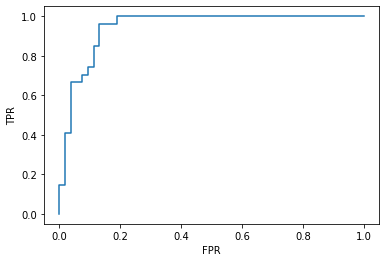

Confusion Matrix: 


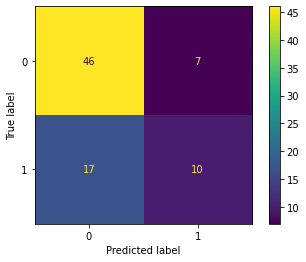

In [ ]:
#Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
nb_classifier = BernoulliNB()
nb_classifier.fit(x_train,y_train)
y_pred = nb_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

we can see accuracy as well as f score is very low the reason behind this is that bernouli naive bays classifier are only for binary feture like(1/0,true/false,yes/no) but our data consist age,salary,gender out of which only gender is only binary and all other are countinious data.so this model will definately be not good.and also we can see we have 24 false prediction.

In [ ]:
#Categorical NB
from sklearn.naive_bayes import CategoricalNB
nb_classifier = CategoricalNB()
nb_classifier.fit(x_train,y_train)
y_pred = nb_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

As our data is not suitable for categorical naive bayes because it didn't accept negative values and we know that x_train,y_train contain negative value because it is standardized. 

In [ ]:
#Complement NB
from sklearn.naive_bayes import ComplementNB
nb_classifier = ComplementNB()
nb_classifier.fit(x_train,y_train)
y_pred = nb_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

same region as complement NB

Accuracy:  87.5
F-Measure:  80.76923076923077
AUC:  0.9447938504542279


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


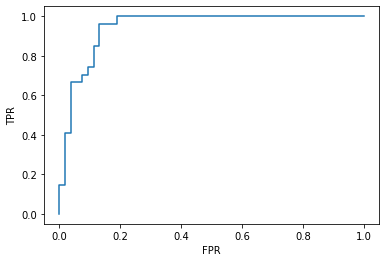

Confusion Matrix: 


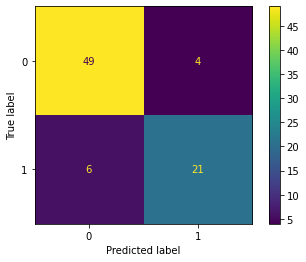

In [ ]:
#Gaussian NB
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)
y_pred = nb_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

Our gaussian naive bayes is prety good because it is only for countinious data and our data is ccountinious.so here we have only 10 false prediction

In [ ]:
#Gaussian NB
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train,y_train)
y_pred = nb_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

from sklearn.metrics import roc_curve
fpr,tpr,threshold = roc_curve(y_test,logreg.predict_proba(x_test)[:,1],pos_label = 1)

from sklearn.metrics import roc_auc_score
print("AUC: ",roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1]))

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

As our data is countinious so discrete naive bayes will not work for our data.only countinious naive bayes will work like gaussian naive. 

#TEXT CLASSIFICATION

In [ ]:
restaurant_reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Quant Master/Classification/Restaurant_Reviews.tsv',
            sep = '\t')

here we have passed sep = '\t' bcz our file is not a comma seprated value instead of that we have a tab seprated value so we have to mention how the feture are seprated than it will identify different column but in csv it identifies column by comma bydefault ','

In [ ]:
restaurant_reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**Steps for text classification**

* All data should be of one case (Lower / Upper).

* stopwords = words like the, a, an must be removed.

* Reduce words to their root form => Stemming or Lemmatizing

* Convert each word into a feature.

* The values for that feature column will be the count / frequency of that feature.

* Instead of count vectors, use TF-IDF (Term Frequency - Inverse Document Frequency).



**what is tf - idf :**  see page 56 to 64 in notes

One measure of how important a word may be is its term frequency (tf)(higher the frequency of the word,that word will be more important), how frequently a word occurs in a document.There are words in a document, however, that occur many times but may not be important; in English, these are probably words like “the”, “is”, “of”, "not",and so forth. We might take the approach of adding words like these to a list of stop words and removing them before analysis, but it is possible that some of these words might be more important in some documents/sentences than others. A list of stop words is not a very sophisticated approach to adjusting term frequency for commonly used words.

Another approach is to look at a term’s inverse document frequency (idf), which decreases the weight for commonly used words and increases the weight for words that are not used very much in a collection of documents. This can be combined with term frequency to calculate a term’s tf-idf (the two quantities multiplied together), the frequency of a term adjusted for how rarely it is used.

The statistic tf-idf is intended to measure how important a word is to a document in a collection (or corpus) of documents, for example, to one novel in a collection of novels or to one website in a collection of websites.

* High tf-idf of a word ,the word will be more important.

* low tf-idf of a word ,the word will be lesser important.


link for what is tf-idf :https://www.tidytextmining.com/tfidf.html

link for calculating tf-idf:https://remykarem.github.io/tfidf-demo/

In [ ]:
import re   #re stands for regular expression
from nltk.stem.porter import PorterStemmer # for coverting(stemming) word to their root words
ps = PorterStemmer()  #craeting object for porter stemmer
import nltk     #nltk stands for natural langauge toolkit.
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# how to remove special and non alphabatical chracter bcz that is not needed for text classificatin.
# see notes page 64 to 66
text = 'The food in that resturant is awesome !!!!.but the service is very bad. Will you come with me next time?????'
text = re.sub('[^A-Za-z ]','',text)  
print(text)


The food in that resturant is awesome but the service is very bad Will you come with me next time


as we can see special character was removed

Reduce words to their root form => **by Stemming or Lemmatizing**

**{**why we need stemming and Lematizing?

the English language has several variants/word of a single term. The presence of these variances in a text corpus results in data redundancy when developing NLP or machine learning models. Such models may be ineffective.

To build a robust model, it is essential to normalize text by removing repetition and transforming words to their base form through stemming.**}**

**differnece between stemming and lemmatizing:** .

**Stemming :->**

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required. In fact, spaCy doesn’t include a stemmer, opting instead to rely entirely on lemmatization.

* Stemming usually operates on single word without knowledge of the context

*  we employ stemming to reduce words to their basic form or stem, which may or may not be a legitimate word in the language(I.e stemmed word may have no meaning) eg. service to servic,the root of trouble, troubled, and troubles is “troubl,” which is not a recognized word.

There are several kinds of stemming algorithms, and all of them are included in Python NLTK: Porter Stemmer,Snowball Stemmer,Lancaster Stemmer,Regexp Stemmer.

* Porter Stemmer :  Five steps of word reduction are used in the method, each with its own set of mapping rules. Porter Stemmer is the original stemmer and is renowned for its ease of use and rapidity. Frequently, the resultant stem is a shorter word with the same root meaning.

In the example below, we construct an instance of PorterStemmer() and use the Porter algorithm to stem the list of words.

```
from nltk.stem import PorterStemmer

porter = PorterStemmer()

words = ['Connects','Connecting','Connections','Connected','Connection','Connectings','Connect']

for word in words:
    print(word,"--->",porter.stem(word))
```
output:

1. Connects ---> connect
2. Connecting ---> connect
3. Connections ---> connect
4. Connected ---> connect
5. Connection ---> connect
6. Connectings ---> connect
7. Connect ---> connect
 
```
from nltk.stem.porter import *
p_stemmer = PorterStemmer()
words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+' --> '+p_stemmer.stem(word))
```
output:

1. run --> run
2. runner --> runner
3. running --> run
4. ran --> ran
5. runs --> run
6. easily --> easili
7. fairly --> fairli

Note how the stemmer recognizes “runner” as a noun, not a verb form or participle. Also, the adverbs “easily” and “fairly” are stemmed to the unusual root “easili” and “fairli”

**Snowball Stemmer**

Martin Porter also created Snowball Stemmer,The algorithm used here is more accurately called the “English Stemmer” or “Porter2 Stemmer”. It offers a slight improvement over the original Porter stemmer, both in logic and speed. Since nltk uses the name SnowballStemmer, we’ll use it here.

from nltk.stem.snowball import SnowballStemmer


```
# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')
words = ['run','runner','running','ran','runs','easily','fairly']
for word in words:
    print(word+' --> '+s_stemmer.stem(word))
```
output:

1. run --> run
2. runner --> runner
3. running --> run
4. ran --> ran
5. runs --> run
6. easily --> easili
7. fairly --> fair

In this case, the stemmer performed the same as the Porter Stemmer, with the exception that it handled the stem of “fairly” more appropriately with “fair”.

Another example from snowball stemmer;

```
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language='english')
words = ['generous','generate','generously','generation']
for word in words:
    print(word,"--->",snowball.stem(word))
```
1. generous ---> generous
2. generate ---> generat
3. generously ---> generous
4. generation ---> generat

**Lancaster Stemmer**

Lancaster Stemmer is straightforward, although it often produces results with excessive stemming. Over-stemming renders stems non-linguistic or meaningless.

```
from nltk.stem import LancasterStemmer
lancaster = LancasterStemmer()
words = ['eating','eats','eaten','puts','putting']
for word in words:
    print(word,"--->",lancaster.stem(word))
```
1. eating ---> eat
2. eats ---> eat
3. eaten ---> eat
4. puts ---> put
5. putting ---> put

**Regexp Stemmer**

Regex stemmer identifies morphological affixes using regular expressions. Substrings matching the regular expressions will be discarded.It basically takes a single regular expression and removes any prefix or suffix that matches the expression.


```
from nltk.stem import RegexpStemmer
regexp = RegexpStemmer('ing$|s$|e$|able$', min=4)
words = ['mass','was','bee','computer','advisable']
for word in words:
    print(word,"--->",regexp.stem(word))
```
output:
1. mass ---> mas
2. was ---> was
3. bee ---> bee
3. computer ---> computer
4. advisable ---> advis

**Lemmatizing :**

Stemming has its drawbacks. If given the token saw, stemming might always return saw, whereas lemmatization would likely return either see or saw depending on whether the use of the token was as a verb or a noun.

In contrast to stemming, lemmatization looks beyond word reduction and considers a language’s full vocabulary to apply a morphological analysis to words. The lemma of ‘was’ is ‘be’ and the lemma of ‘mice’ is ‘mouse’.

* Lemmatization usually considers words and the context of the word in the sentence and it dipend on the action of the word either it is noun/verb etc accordingly word will be converted. 

Lemmatization is typically seen as much more informative than simple stemming, which is why Spacy has opted to only have Lemmatization available instead of Stemming

* spaCy is a free, open-source library for advanced Natural Language Processing

Lemmatization looks at surrounding text to determine a given word’s part of speech, it does not categorize phrases.

example of lemmetizing:

```
import spacy
nlp = spacy.load('en_core_web_sm')
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')
#Here we’re using an f-string to format the printed text by setting minimum  field widths and adding a left-align to the lemma hash value.
doc = nlp(u"I saw eighteen mice today!")

show_lemmas(doc)
```
output: 


1. I            PRON   561228191312463089     -PRON-
2. saw          VERB   11925638236994514241   see
3. eighteen     NUM    9609336664675087640    eighteen
4. mice         NOUN   1384165645700560590    mouse
5. today        NOUN   11042482332948150395   today
6. !            PUNCT  17494803046312582752   !

Notice that the lemma of `saw` is `see`, `mice` is the plural form of `mouse`, and yet `eighteen` is its own number, *not* an expanded form of `eight`.

for deeper knowlede in lemmetization : https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/

reference of above theory and code:

1. https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb221#:~:text=Stemming%20and%20Lemmatization%20both%20generate,words%20which%20makes%20it%20faster.

2. https://www.analyticsvidhya.com/blog/2021/11/an-introduction-to-stemming-in-natural-language-processing/












for stemming/lemmetizing we have to split the sentence ,let a sentence and split that sentence after that we will stem that splitted word:

In [ ]:
text

'The food in that resturant is awesome but the service is very bad Will you come with me next time'


```
text = text.split(' ')  #for splitting the text senetence
print(text)
text = [ps.stem(word) for word in text]  #ps stands for object name porter stemmer
print(text)
# now stemmed word list in text ,we have make list word to a sentence.
text = ' '.join(text)   # we have joined the list word to an empty string with a space using join function 
print(text)
```

**output:**

['The', 'food', 'in', 'that', 'resturant', 'is', 'awesome', '', 'but', 'the', 'service', 'is', 'very', 'bad', 'Will', 'you', 'come', 'with', 'me', 'next', 'time']

['the', 'food', 'in', 'that', 'restur', 'is', 'awesom', '', 'but', 'the', 'servic', 'is', 'veri', 'bad', 'will', 'you', 'come', 'with', 'me', 'next', 'time']

the food in that restur is awesom  but the servic is veri bad will you come with me next time

**comment:** 

now we can see that we still have stopword like is,in,the,not,will,you etc.so we have to remove stopword.But after the stemming some of the stopword changed like service to servic,was to wa etc so we have to remove stopword before stemming.



In [ ]:
text = text.split(' ')  #for splitting the text senetence
print(text)


['The', 'food', 'in', 'that', 'resturant', 'is', 'awesome', 'but', 'the', 'service', 'is', 'very', 'bad', 'Will', 'you', 'come', 'with', 'me', 'next', 'time']


now we can see that we still have stopword like is,in,the,not,will,you etc.so we have to remove stopword.But after the stemming some of the stopword changed like service to servic,was to wa etc so we have to remove stopword before stemming

In [ ]:
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  
#we saying here that in the list stem only those word which are not in stopword list and store them into text after stemming
print(text)
# now stemmed word list in text ,we have make list word to a sentence.


['the', 'food', 'restur', 'awesom', 'servic', 'bad', 'will', 'come', 'next', 'time']


now we can see that stop word was removed.

In [ ]:
text = ' '.join(text)   # we have joined the list word to an empty string with a space using join function 
print(text) 

the food restur awesom servic bad will come next time


In [ ]:
corpus = [] #is a list which will store pre-processed text reviews.

for i in range(0,restaurant_reviews.shape[0]):            #here we are selecting all reviews data which is in  first colimn in restaurant reviews docs 
    review = restaurant_reviews['Review'][i] #review is string form of text review and we are accessing review column from restaurant review data
    review = re.sub('[^A-Za-z ]','',review) #remove non alpha, non space char. in review
    review = review.lower() #Convert review to lowercase
    review = review.split(' ') #Split the review into a list with reference at space of words 
    review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))] #stem each word of the review and store it back in the list if it's not a stopword
    review = ' '.join(review) #join all elements of list review to string with space separation
    corpus.append(review)

for i in range(0,10):   #printing first 10 initial reviews and preprocessesed review
    print(restaurant_reviews['Review'][i])
    print(corpus[i],"\n")

Wow... Loved this place.
wow love place 

Crust is not good.
crust good 

Not tasty and the texture was just nasty.
tasti textur nasti 

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
stop late may bank holiday rick steve recommend love 

The selection on the menu was great and so were the prices.
select menu great price 

Now I am getting angry and I want my damn pho.
get angri want damn pho 

Honeslty it didn't taste THAT fresh.)
honeslti didnt tast fresh 

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
potato like rubber could tell made ahead time kept warmer 

The fries were great too.
fri great 

A great touch.
great touch 



As we have removed stopwords from reviews,so due to that 'not' and 'no' was also get removed from preprocessed review data like:

* original: Crust is not good.
* processed: crust good 

so after removing stopword ,sense/class of some word changes complitely from negative to positive so we have to remove 'not','no' from stopwords list so that no/not can remain in review column  

In [ ]:
our_stopwords = set(stopwords.words('english'))
our_stopwords.remove('not')
our_stopwords.remove('no')
print(our_stopwords)

{'ve', 'yourselves', 'y', 'didn', 'both', 'is', "weren't", 'did', 'each', "shan't", 'whom', 'have', 'after', 'at', 'because', 'don', 'who', 'until', 'isn', "mightn't", 'i', 'am', "aren't", 'yourself', 'his', 'there', 'once', 'for', 'out', 'himself', 'too', 'its', "shouldn't", 'into', "wouldn't", 'same', "won't", 'myself', 'all', "needn't", "haven't", 'ma', 'o', 'a', "you've", 'as', 'doesn', 'me', 'wasn', 'what', "hasn't", 'more', 'haven', "hadn't", 'ours', 'against', 'on', 'has', 'had', 'doing', 'wouldn', "doesn't", 'them', 'here', 'down', 'that', 'off', "you're", 'do', 'having', 'of', 'than', 'to', 'below', 'before', 'in', 'hers', 'other', 'how', 'mightn', 'under', 'these', 'with', 'why', "that'll", 'it', 'again', 'just', 'will', 'hadn', "wasn't", 'shouldn', 'so', 'weren', 'and', 't', 'while', 'herself', 'but', 'll', 'hasn', 'through', 'needn', "she's", "you'll", 'where', 'he', 'itself', "don't", 'an', 'now', 'theirs', 'her', 'aren', "mustn't", 's', "should've", 'some', 'are', 'themse

In [ ]:

corpus = [] #is a list which will store pre-processed text reviews.

for i in range(0,restaurant_reviews.shape[0]):            #here we are selecting all reviews data which is in  first colimn in restaurant reviews docs 
    review = restaurant_reviews['Review'][i] #review is string form of text review and we are accessing review column from restaurant review data
    review = re.sub('[^A-Za-z ]','',review) #remove non alpha, non space char. in review
    review = review.lower() #Convert review to lowercase
    review = review.split(' ') #Split the review into a list with reference at space of words 
    review = [ps.stem(word) for word in review if word not in our_stopwords] #stem each word of the review and store it back in the list if it's not a stopword
    review = ' '.join(review) #join all elements of list review to string with space separation
    corpus.append(review)

for i in range(0,10):   #printing first 10 initial reviews and preprocessesed review
    print(restaurant_reviews['Review'][i])   #original review
    print(corpus[i],"\n")  #preprocessed review

Wow... Loved this place.
wow love place 

Crust is not good.
crust not good 

Not tasty and the texture was just nasty.
not tasti textur nasti 

Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.
stop late may bank holiday rick steve recommend love 

The selection on the menu was great and so were the prices.
select menu great price 

Now I am getting angry and I want my damn pho.
get angri want damn pho 

Honeslty it didn't taste THAT fresh.)
honeslti didnt tast fresh 

The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.
potato like rubber could tell made ahead time kept warmer 

The fries were great too.
fri great 

A great touch.
great touch 



Now in our processed data 'not' is also there.

In [ ]:
x = corpus #x is a list because, TF-IDF vectorizer works on strings
y = restaurant_reviews['Liked'].values #y is an array of 1's and 0's

In [ ]:
x[:5]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [ ]:
y[:5]

array([1, 0, 0, 1, 1])

In [ ]:
y = y.reshape((-1,1))


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,
                                                 random_state = 2022)

In [ ]:
print(len(x_train),len(x_test),y_train.shape,y_test.shape)  #list has no function shape so we have to use len for list

850 150 (850, 1) (150, 1)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer



With Tfidftransformer you will systematically compute word counts using CountVectorizer and then compute the Inverse Document Frequency (IDF) values and only then compute the Tf-idf scores.

With Tfidfvectorizer on the contrary, you will do all three steps at once. Under the hood, it computes the word counts, IDF values, and Tf-idf scores all using the same dataset.

for more detials : https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YpnzIXZN3IU

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

In [ ]:
x_train_tf = tf_idf_vectorizer.fit_transform(x_train)  #here we are using fit and transform both function together for training data
#but for testing data we will only transform the data

In [ ]:
x_train_tf.shape

(850, 1487)

the shape function is telling us that it has 850 docs/sentence and 1487 columns or fetures/unique word for that we will calculate tf & idf & tf-idf

In [ ]:
# get the first vector out (for the first document) 
first_vector_x_train_tf=x_train_tf[1]

In [ ]:
 
# place tf-idf values in a pandas data frame 
df1 = pd.DataFrame(first_vector_x_train_tf.T.todense(), index=tf_idf_vectorizer.get_feature_names(), columns=["tfidf"])
df1 = df1.sort_values(by=["tfidf"],ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df1.head(10)

,tfidf
wont,0.788339
back,0.615241
absolut,0.000000
poop,0.000000
poison,0.000000
point,0.000000
pneumat,0.000000
plu,0.000000
plethora,0.000000
pleasant,0.000000


As we can see only first two word has tf-idf score bcz that is only present first document/sentence that we have pased as :

first_vector_x_train_tf=x_train_tf[1]

bcz their term count/term frequency will be zero for 1st document so their tf*idf will be zero.

we can see that as we change sentence number/document number the tf-idf and word will change

In [ ]:
first_vector_x_train_tf=x_train_tf[5]
df1 = pd.DataFrame(first_vector_x_train_tf.T.todense(), index=tf_idf_vectorizer.get_feature_names(), columns=["tfidf"])
df1 = df1.sort_values(by=["tfidf"],ascending=False)
df1.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
salti,0.60715
hella,0.60715
bacon,0.51258
absolut,0.00000
platter,0.00000
poison,0.00000
point,0.00000
pneumat,0.00000
plu,0.00000
plethora,0.00000


now we will tranform testing data set

In [ ]:
x_test_tf = tf_idf_vectorizer.transform(x_test)

In [ ]:
x_test_tf.shape

(150, 1487)

Now we will use support vector classification model to do classification of tranformed x_train,x_test 

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train_tf,y_train)
y_pred = svc_classifier.predict(x_test_tf)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  82.66666666666667
F-Measure:  82.1917808219178
Confusion Matrix: 


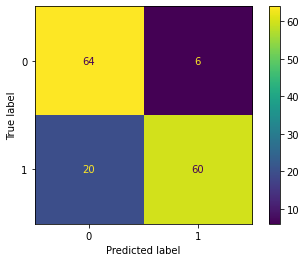

In [ ]:
from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred)*100)

#from sklearn.metrics import roc_curve
#fpr,tpr,threshold = roc_curve(y_test,svc_classifier.predict_proba(x_test)[:,1],pos_label = 1)

#from sklearn.metrics import roc_auc_score
#print("AUC: ",roc_auc_score(y_test,svc_classifier.predict_proba(x_test)[:,1]))

#plt.plot(fpr,tpr)
#plt.xlabel("FPR")
#plt.ylabel("TPR")
#plt.show()

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

As we can see our model has high false negative value(high error in predicting positive value I.e it predict wrongly high number of  +ve to -ve.

Now we will use grid search for best SVC parameter

In [ ]:
from sklearn.model_selection import GridSearchCV
#parameter grid is a list of dictionaries of parameters that the model should be tested on
parameters_grid = [{'C':[0.8,0.9,0.95,1,1.05,1.1,1.2],'kernel':['rbf'],'gamma':[0.8,0.9,0.95,1,1.05,1.1,1.2]}]
gridsearch_obj = GridSearchCV(estimator = svc_classifier,
             param_grid = parameters_grid,
             scoring = 'accuracy',
             cv = 10)
gridsearch_results = gridsearch_obj.fit(x_train_tf,y_train)


In [ ]:
gridsearch_results.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

So by defaut these are best parameter

#ASSIGNMENT 1

https://drive.google.com/file/d/1B0tr-8-lrKxcXcr7GJKSQwR7PJ9i5fO5/view?usp=sharing

Use the above dataset to classify text into spam and non spam.

Try with all classifier models and find the best classifier model with best parameters.

Instead of TFIDF Vectorizer, see how the performance differs if you use a simple CountVectorizer

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html?highlight=count%20vector#sklearn.feature_extraction.text.CountVectorizer

#ASSIGNMENT 2

Give a new sentence to be classified by the model:

"The restaurant is absolutely pathetic"

1. Take the new sentence as a string
2. Run it through pre-processing steps (lowercase, stem, stopword removal)
3. Convert the pre-processed string (transform) to tf_idf format
4. use the transformed result as x_test and predict.